In [15]:
import pandas as pd
from prophet import Prophet


In [60]:
## Seller 의 월별 매출을 Parameter 로 받은 후 DataFrame 로 변경
# {ds = datetime, y = value}
df = pd.DataFrame({"ds" : [pd.to_datetime('2022-6-1'), pd.to_datetime('2022-7-1'), pd.to_datetime('2022-8-1'), pd.to_datetime('2022-9-1'), pd.to_datetime('2022-10-1')],
                   "y" : [9.590761, 8.519590, 8.183677, 8.072467, 7.893572]})

In [61]:
df

,ds,y
0,2022-06-01,9.590761
1,2022-07-01,8.519590
2,2022-08-01,8.183677
3,2022-09-01,8.072467
4,2022-10-01,7.893572


In [62]:
m = Prophet() # Prophet 선언
m.fit(df) # DataFrame

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


In [65]:
future = m.make_future_dataframe(periods=31)

In [66]:
future.tail()

,ds
31,2022-10-28
32,2022-10-29
33,2022-10-30
34,2022-10-31
35,2022-11-01


In [67]:
forecast = m.predict(future)

In [68]:
forecast.tail() # 분석 결과

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2022-10-28,7.349142,7.018331,7.679580,7.348943,7.349295,0.0,0.0,0.0,0.0,0.0,0.0,7.349142
32,2022-10-29,7.336615,6.956374,7.681655,7.336391,7.336784,0.0,0.0,0.0,0.0,0.0,0.0,7.336615
33,2022-10-30,7.324087,7.005689,7.657855,7.323838,7.324271,0.0,0.0,0.0,0.0,0.0,0.0,7.324087
34,2022-10-31,7.311559,6.942158,7.645409,7.311293,7.311760,0.0,0.0,0.0,0.0,0.0,0.0,7.311559
35,2022-11-01,7.299031,6.949046,7.611875,7.298746,7.299248,0.0,0.0,0.0,0.0,0.0,0.0,7.299031


In [69]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2022-10-28,7.349142,7.018331,7.679580
32,2022-10-29,7.336615,6.956374,7.681655
33,2022-10-30,7.324087,7.005689,7.657855
34,2022-10-31,7.311559,6.942158,7.645409
35,2022-11-01,7.299031,6.949046,7.611875


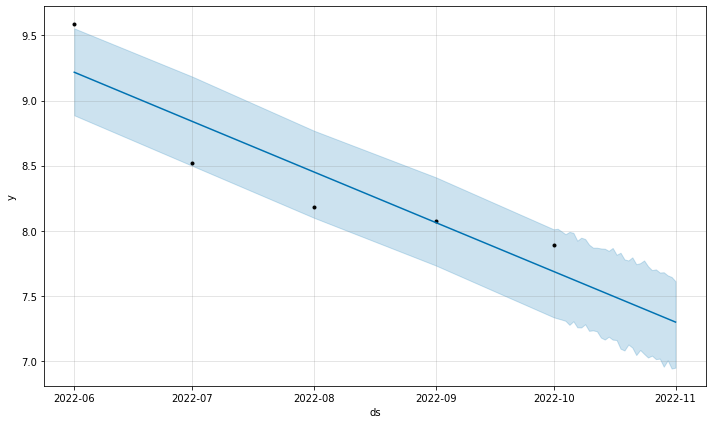

In [70]:
fig1 = m.plot(forecast)

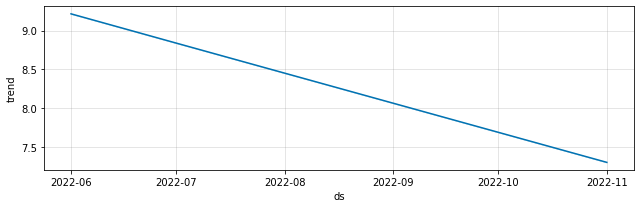

In [72]:
fig2 = m.plot_components(forecast)